In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
sns.set()
status_data = pd.read_csv('E:\EECS\Corona project\COVID_final\patient_data.csv')
country_data = pd.read_csv('E:\EECS\Corona project\COVID_final\covid_19_data.csv')
status_data = status_data[['id', 'gender', 'age', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered']]

In [73]:
bools = ['visiting Wuhan', 'from Wuhan', 'death', 'recovered']
status_data[bools] = status_data[bools].fillna(0)
status_data.loc[(status_data.death.str.len() > 1.0), 'death'] = 1
status_data.loc[(status_data.recovered.str.len() > 1.0), 'recovered'] = 1
status_data[bools] = status_data[bools].astype(int)
status_data[bools] = status_data[bools].astype(bool)

In [74]:
gender = status_data[['gender', 'death', 'recovered']]
gender = gender.dropna(subset=['gender'])
total = len(gender)
male = len(gender[gender['gender'] == 'male'])
female = len(gender[gender['gender'] == 'female'])
filtered = gender.groupby('gender').sum()
filtered['positive'] = [male, female]
filtered = filtered / total * 100
filtered = filtered.reset_index()
filtered

,gender,death,recovered,positive
0,female,1.528117,4.889976,55.745721
1,male,3.056235,5.929095,44.254279


In [75]:
reshaped = filtered.melt(id_vars=['gender'])
reshaped.columns = ['gender', 'status', 'percentage']
reshaped = reshaped.sort_values(by=['percentage'], ascending=False)

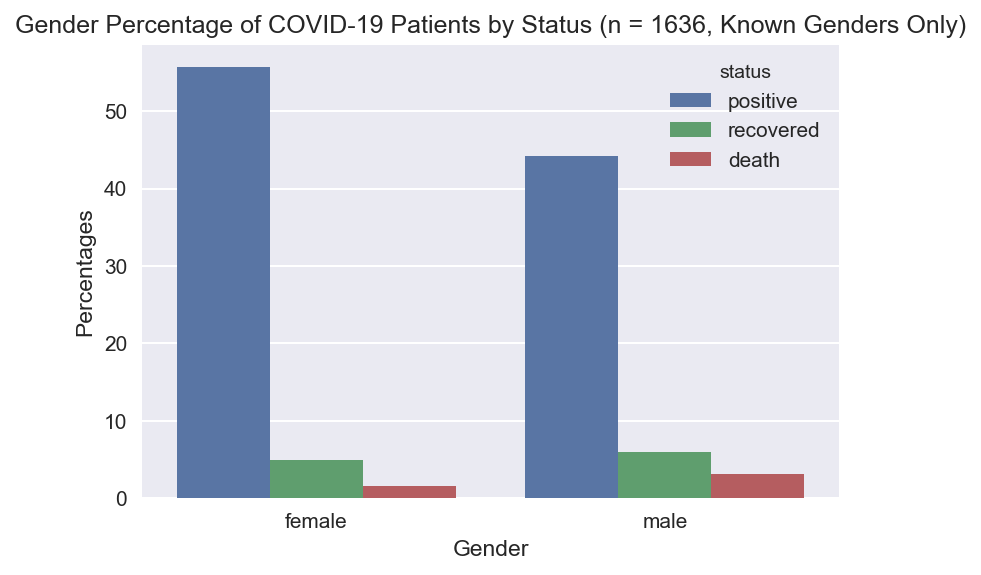

In [76]:
plt.figure(dpi=150)
gender_plot = sns.barplot(x='gender', y='percentage', data=reshaped, hue='status')
plt.title('Gender Percentage of COVID-19 Patients by Status (n = 1636, Known Genders Only)')
plt.ylabel('Percentages')
plt.xlabel('Gender')
gender_plot

In [80]:
age_desc = ['Adolescents(<20)', 'Young Adults (20~39)', 'Adults (40~64)', 'Elderly (65+)']
age = status_data[['age', 'death', 'recovered']]
age = age.dropna(subset=['age'])
total = len(age)
combined = pd.DataFrame(data={})
adol = age[age.age < 20].copy()
adol.age = age_desc[0]
young = age[(age.age >= 20) & (age.age < 40)].copy()
young.age = age_desc[1]
adults = age[(age.age >= 40) & (age.age < 65)].copy()
adults.age = age_desc[2]
elderly = age[age.age >= 65].copy()
elderly.age = age_desc[3]
combined = pd.concat([adol, young, adults, elderly])
combined = combined.groupby('age').sum()
combined['confirmed'] = [len(adol), len(adults), len(elderly), len(young)]
combined = combined / total * 100
combined = combined.reindex(age_desc).reset_index()
combined

,age,death,recovered,confirmed
0,Adolescents(<20),0.000000,0.864362,4.255319
1,Young Adults (20~39),0.199468,3.856383,25.132979
2,Adults (40~64),0.997340,5.252660,42.287234
3,Elderly (65+),3.856383,1.130319,28.324468


In [84]:
reshaped = combined.melt(id_vars=['age'])
reshaped.columns = ['age', 'status', 'percentage']
"""status = ['death', 'recovered', 'confirmed']
for i in range(3):
    temp = pd.DataFrame(data={})
    temp['age'] = age_desc
    temp['percentages'] = combined.loc[:, [status[i]]]
    temp['status'] = [status[i], status[i], status[i], status[i]]
    if len(reshaped) == 0:
        reshaped = temp
    else:
        reshaped = pd.concat([reshaped, temp])"""
reshaped

,age,status,percentage
0,Adolescents(<20),death,0.000000
1,Young Adults (20~39),death,0.199468
2,Adults (40~64),death,0.997340
3,Elderly (65+),death,3.856383
4,Adolescents(<20),recovered,0.864362
5,Young Adults (20~39),recovered,3.856383
6,Adults (40~64),recovered,5.252660
7,Elderly (65+),recovered,1.130319
8,Adolescents(<20),confirmed,4.255319
9,Young Adults (20~39),confirmed,25.132979


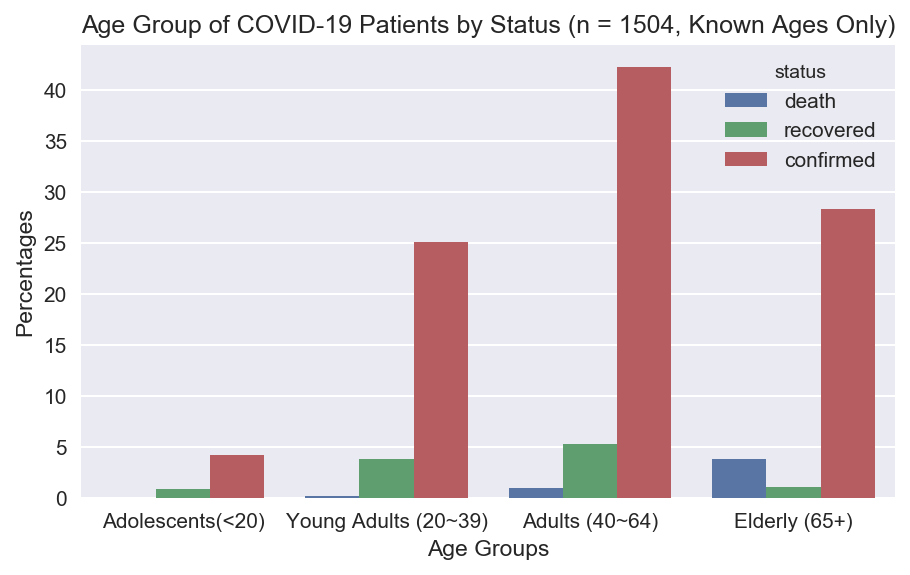

In [85]:
plt.figure(figsize=(7,4), dpi=150)
age_plot = sns.barplot(x='age', y='percentage', data=reshaped, hue='status')
plt.title('Age Group of COVID-19 Patients by Status (n = 1504, Known Ages Only)')
plt.ylabel('Percentages')
plt.xlabel('Age Groups')
age_plot

In [152]:
def consolidate(df):
    df = df.reset_index().melt(id_vars=['Country/Region'])
    df.columns = ['Country/Region', 'Status', 'Count']
    #df = df.sort_values(by=['Count', 'Country/Region'], ascending=False)
    return df

In [109]:
def country_plot(df, note):
    plot = sns.barplot(x='Country/Region', y='Count', data=df, hue='Status')
    plt.title('Country/Region Count of Patients by Status (' + note + ')')
    plt.ylabel('Count')
    plt.xlabel('Country/Region')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    plot

In [157]:
current = country_data[(country_data['ObservationDate'] == '03/14/2020')]
last_week = country_data[(country_data['ObservationDate'] == '03/07/2020')]
current = current[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
last_week = last_week[['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
current = current.groupby('Country/Region').sum().reset_index()
last_week = last_week.groupby('Country/Region').sum().reset_index()
growth = last_week.loc[:, ['Country/Region']].merge(current, left_on='Country/Region', right_on='Country/Region', how='left')
growth = consolidate(growth)
(((growth['Count'] / consolidate(last_week)['Count']) - 1 )* 100)

0              NaN
1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
          ...     
378     100.000000
379            NaN
380            inf
381            inf
382     200.000000
383     300.000000
384            NaN
385            inf
386            inf
387            inf
388            NaN
389      34.615385
390            NaN
391            NaN
392            NaN
393     277.777778
394    1623.333333
395       0.000000
396            inf
397      33.333333
398      66.666667
399      12.

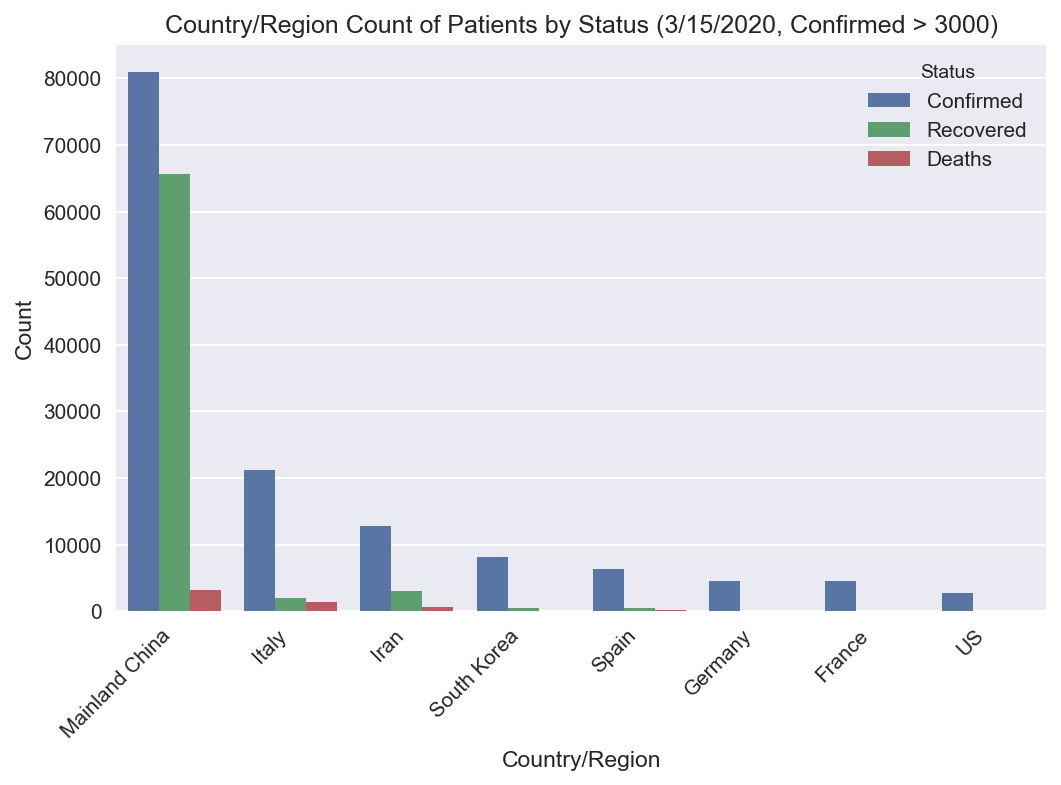

In [110]:
more = current[current['Confirmed'] > 1000]
more = consolidate(more)
plt.figure(figsize=(8,5), dpi=150)
country_plot(more, '3/14/2020, Confirmed > 1000')

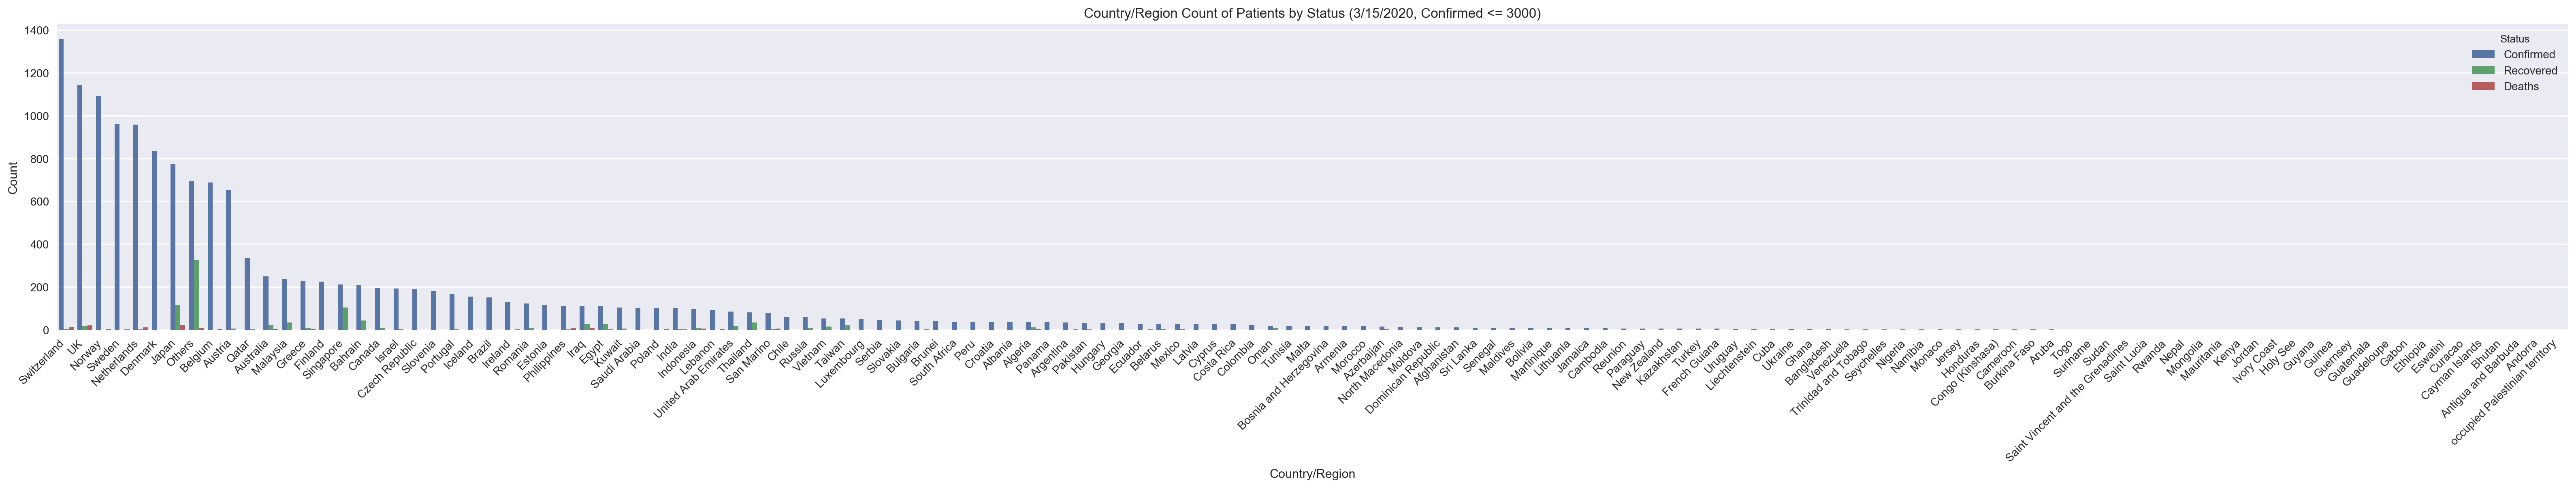

In [101]:
less = current[current['Confirmed'] <= 1000]
less = consolidate(less)
plt.figure(figsize=(40,5), dpi=200)
country_plot(less, '3/14/2020, Confirmed <= 1000')

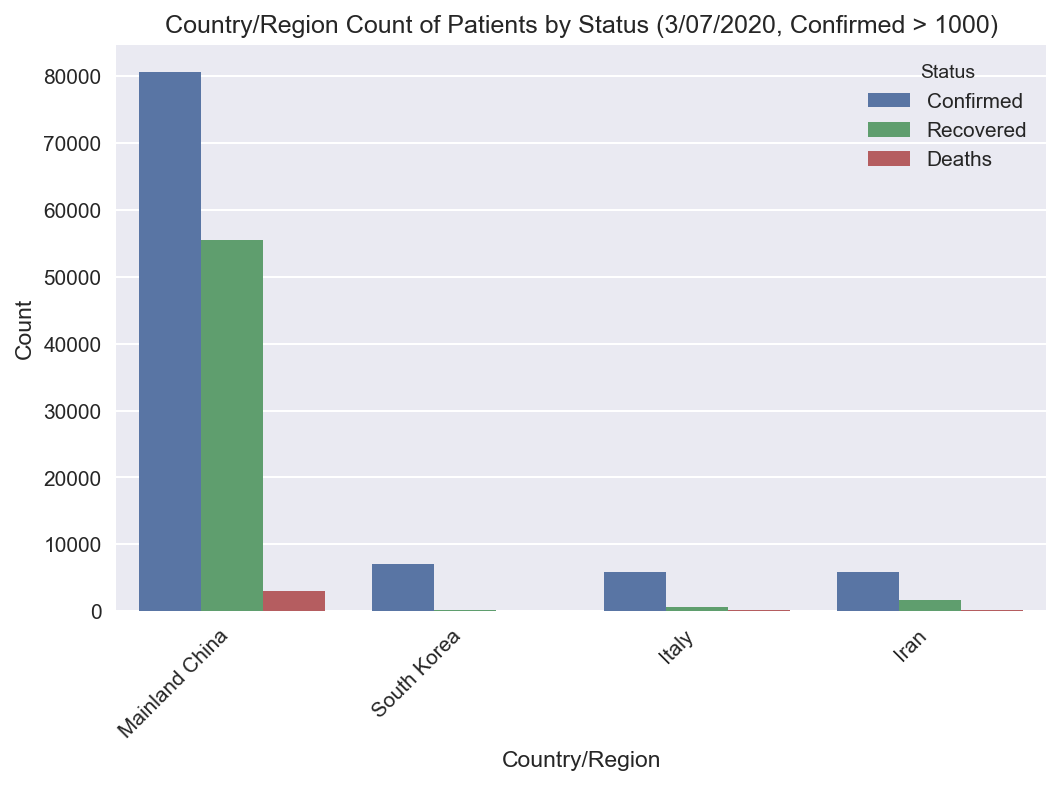

In [115]:
more = last_week[last_week['Confirmed'] > 1000]
more = consolidate(more)
plt.figure(figsize=(8,5), dpi=150)
country_plot(more, '3/07/2020, Confirmed > 1000')

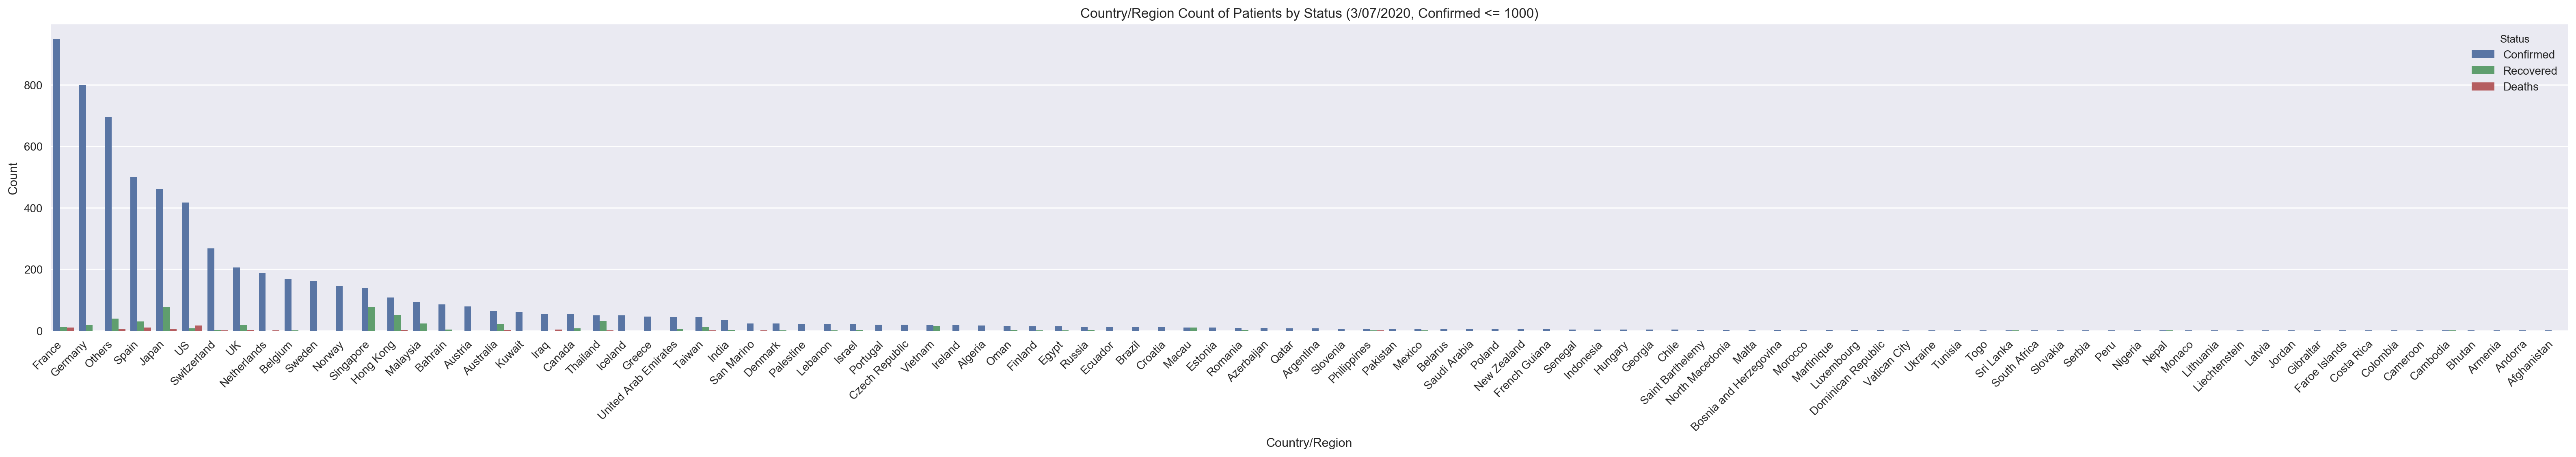

In [116]:
less = last_week[last_week['Confirmed'] <= 1000]
less = consolidate(less)
plt.figure(figsize=(40,5), dpi=200)
country_plot(less, '3/07/2020, Confirmed <= 1000')